# Reanalysis ERA5-Land MONTHLY data (from 1981 to present)
## Download, Mapping and time serie extraction (from Copernicus "Climate Data Store")
MONTHLY Precipitations, runoff, potential evaporation, evaporation, temperature and snow stock.

- Data: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land-monthly-means?tab=overview
- ERA5-Land Data documentation: https://confluence.ecmwf.int/display/CKB/ERA5-Land%3A+data+documentation


author: Loïc Duffar https://github.com/loicduffar

### How to PROCEED ?
Run cells in order (red star <font color="red">*</font> indicates major steps):
- <a href=#section01>1)</a> <font color="red">*</font>Data download (only NetCDF format here, because more handy than GRIB format)
- <font color="red">*</font>IF the ERA5 file is already downloaded, start by the 2nd cell instead of the 1rst one
- <a href=#section02>2)</a> <font color="red">*</font>Customization, initialization and display netCDF file infos
- <a href=#section03>3)</a> <font color="red">*</font>Plot annual and monthly interannual average maps (and save to files)
- <a href=#section04>4)</a> <font color="red">*</font>Plot monthly time series (for one pixel and for a possible polygon), and export them to excel file
- <a href=#section05>5)</a> Annual maps animation
- <a href=#section06>6)</a> Montlhy maps animation
- <a href=#section07>7)</a> Plot Maps over 12 months for a specific year (and one month map with basemap)


### How to AUTHORIZE the execution of the python code on Windows ? (only once)
https://cds.climate.copernicus.eu/api-how-to

- If you do not have an account, please register on the CDS registration page
- Log in
- Copy the <a href="https://cds.climate.copernicus.eu/api-how-to">code with your personal key</a> (see below), into the file "USER/.cdsapirc" (in Windows environment)
(The file starting with a dot can be created using Notepad: "File> Save as> Type: All files> File name: .cdsfapirc"

    url: https://cds.climate.copernicus.eu/api/v2     
    key: {uid}:{api-key}

###  How to CREDIT data ?
Where the Licensee communicates or distributes Copernicus Products to the public, the Licensee shall inform the recipients of the source by using the following or any similar notice:

"Generated using Copernicus Climate Change Service information [Year]"

### <a name=section01></a>1) Data download
- 1. customize the code below to choose the product (here 'monthly_averaged_reanalysis'), the parameter (e.g. 'total_precipitation', 'potential_evaporation' etc...), period of years, aera limits (lat/lon min and max) and file name (with the right extension grid or nc). 
- 2. Run the frist cell to download the file. The running time is displayed at the end of the process (You can view the job survey here: https://cds.climate.copernicus.eu/live/queue). NB: the server running time can be 6 minutes for 40 years and an area of 200x200 km.
- If the file is already downloaded, you don't need to download it again. Just edit and run the second cell, instead of the first one and process the data starting with the 3rd cell.

In [1]:
"""
Created on Sept 2020
@author: Loïc Duffar
"""
import cdsapi
import timeit
import os

# +++++++ Customization
file_format = 'netcdf'  # 'grib' or 'netcdf' (but ONLY netcdf is supported by the code below for mapping and time serie extraction)
folder_out = r'D:\Documents\A\Download\Hydro-Climato\CDS (Climate Data Store)\ERA5-Land'
downloaded_file = 'ERA5-Land monthly averaged 7_variables 1981-2020 ASIE.nc'

# ....... AREA to extract
lat_min, lat_max, lon_min, lon_max =[6., 10., 79.71, 81.88]# SRI LANKA
lat_min, lat_max, lon_min, lon_max =[17.5, 20.1, -74.5, -68.3]# HAITI
lat_min, lat_max, lon_min, lon_max =[42.9, 45.1, 4.6, 7.55]# FRANCE PACA
lat_min, lat_max, lon_min, lon_max =[41.2, 51.14, -4.9, 10.]# FRANCE
lat_min, lat_max, lon_min, lon_max =[35.37, 71.55, -9.66, 49.5]# EUROPA
lat_min, lat_max, lon_min, lon_max =[-35.5, 37.4, -25.2, 55.95]# AFRICA
lat_min, lat_max, lon_min, lon_max =[-56., 25.5, -92.15, -34.5]# SOUTH & CENTRAL AMERICA
lat_min, lat_max, lon_min, lon_max =[-11.3, 60.5, 31.9, 180.]# ASIA

# ....... PERIOD to extract
start_year = 1981                                            # from 1981 
end_year = 2020                                              # to present year

# ....... VARIABLE(S) to extract: single name or list of names among those below
#         - total_precipitation, surface_runoff,  runoff, snow_depth_water_equivalent (m)
#         - 2m_temperature (K)
#         - potential_evaporation, total_evaporation, evaporation_from_open_water_surfaces_excluding_ocean, evaporation_from_bare_soil (m negative)
variables_list = ['total_precipitation',
                  'surface_runoff',
                  'snow_depth_water_equivalent',
                  '2m_temperature',
                  'potential_evaporation', 'total_evaporation', 'evaporation_from_open_water_surfaces_excluding_ocean',
                 ]

# +++++++ Download
years = [ str(start_year +i ) for i in range(end_year - start_year + 1)]                   
if not os.path.exists(folder_out): os.mkdir(folder_out)
downloaded_file = os.path.join(folder_out, downloaded_file)

print('Process started. Please wait the ending message ... ')
start = timeit.default_timer()
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land-monthly-means',
    {
        'format': file_format,                                  
        'product_type': 'monthly_averaged_reanalysis',
        'variable': variables_list,                   
        'year': years,
        'month': [ '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12' ],
        'time': '00:00',
        'area': [ lat_min, lon_min, lat_max, lon_max ],
    }, downloaded_file
    )

stop = timeit.default_timer()
print('Process completed in ', (stop - start)/60, ' minutes')

2020-12-27 15:34:56,208 INFO Welcome to the CDS


Process started. Please wait the ending message ... 


2020-12-27 15:34:56,210 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land-monthly-means
2020-12-27 15:34:56,413 INFO Request is queued
2020-12-27 15:34:57,458 INFO Request is running
2020-12-27 15:53:15,618 INFO Request is completed
2020-12-27 15:53:15,622 INFO Downloading https://download-0005.copernicus-climate.eu/cache-compute-0005/cache/data5/adaptor.mars.internal-1609079697.9560592-13879-1-fa2d6fde-f780-4199-9b8f-98962844a24e.nc to D:\Documents\A\Download\Hydro-Climato\CDS (Climate Data Store)\ERA5-Land\ERA5-Land monthly averaged 7_variables 1981-2020 ASIE.nc (5.7G)
2020-12-27 16:02:57,605 INFO Download rate 10M/s                                                                       


Process completed in  28.028825227166696  minutes


### Edit and run this cell, instead of the first one, ONLY IF the ERA5 file is already downloaded
- Enter the infos for the already donwloaded file (folder ans file name)

In [8]:
import os

# +++++++ Customization
folder_out = r'D:\Documents\A\Download\Hydro-Climato\CDS (Climate Data Store)\ERA5-Land'
downloaded_file = 'ERA5-Land monthly averaged 7_variables 1981-2020 ASIE.nc'

# +++++++ Initialisation
downloaded_file = os.path.join(folder_out, downloaded_file)

### <a name=section02></a>2) Customization, initialization and display netCDF file infos
- Define the variable and the geographic area to use (the file can contain more than one variable and a larger area) 
- Define a polygon file for average computation and a vector file for map wrapping (points, lines, polygons). The CRS of the files must be WGS84 (coordinate reference system)
- Run the cell to display file infos

NB: Currently works only for some parameters (see code below). For more parameters, the code below has to be adapted with the correct name in addition to "tp", "ro", "sd", "t2m", "pev", "e", "evaow", "evabs" etc...

In [75]:
import netCDF4
import xarray as xr
import rioxarray
import geopandas as gpd
import hvplot.xarray
import cartopy
print('Cartopy version: ', cartopy.__version__)

# +++++++ Customization
# ------- Choose  the data (the file can contain more than one variable and a larger area)
# . . . . Choose one variable in the file
variable = 'total_precipitation'   
# . . . . Area clipping. [None, None, None, None] for no clipping 
lat_min, lat_max, lon_min, lon_max =[5.9, 9.9, 79.71, 81.88]# SRI LANKA

# ------- Vector files 
# ....... Polygon file (shape file) for plotting and average computation (path INCLUDING folder)
polygon_file = r'C:\Users\duffar\Documents\A\ETUDES\2018 Sri lanka MUNDENI ARU\Maps\Rugam_subcatchment_BV.shp'
# ....... Shape file (point, line or polygon) for plotting (path INCLUDING FOLDER)
wrapping_file = r'C:\Users\duffar\Documents\A\ETUDES\2018 Sri lanka MUNDENI ARU\Maps\Mundeni Aru_RH.shp'

# +++++++ Initialisation
proj = cartopy.crs.PlateCarree()
cmap = 'jet'
res = '10m'                  # resolution for naturalearth basemap with cartopy: 10m, 50m or 110m (10m = 1/ 10 000 000)
nlevels = 9                  # number of contour levels for maps
annual_file = 'ERA5 Annual.png'
facet_plot_subset_file = 'ERA5 Annual by month.png'
gdf_polyg = gpd.read_file(polygon_file) if os.path.exists(polygon_file) else None
gdf_wrapping = gpd.read_file(wrapping_file) if os.path.exists(wrapping_file) else None

# +++++++ Display file info
print('File info by netCDF4')
print('====================')
in_nc = netCDF4.Dataset(downloaded_file) # read netCDF object
display(in_nc) # print file information

print('File info by xarray')
print('====================')
xarray_src = xr.open_dataset(downloaded_file)
display(xarray_src) # print file information

# +++++++ Area clipping
if lat_min!=None and lat_max!=None and lon_min!=None and lon_max!=None:
    #xarray_src.rio.set_crs('epsg:4326')
    #xarray_src = xarray_src.rio.clip_box(lon_min, lat_min, lon_max, lat_max)
    mask_lon = (xarray_src.longitude >= lon_min) & (xarray_src.longitude <= lon_max)
    mask_lat = (xarray_src.latitude >= lat_min) & (xarray_src.latitude <= lat_max)
    xarray_src = xarray_src.where(mask_lon & mask_lat, drop=True)

# +++++++ Unit conversion
# https://confluence.ecmwf.int/display/CKB/ERA5-Land%3A+data+documentation
param_mean = ['sd', 't2m']    # parameters to be averaged by time step (not summed)
param_negative = ['pev', 'e', 'evaow', 'evabs']    # negative parameters to be transformed positive
param_cumul = ['tp'] # Cumlulative parameters (usefull ONLY for HOURLY DATA)
param_meter = ['tp', 'sro', 'ssro', 'ro', 'sd', 'pev', 'e', 'evaow', 'evabs']# Parameters in meter to be converted in mm
param_temp = ['t2m']

if variable=='total_precipitation':
    param = 'tp'
elif variable=='surface_runoff':
    param = 'sro'
elif variable=='sub_surface_runoff':
    param = 'ssro'
elif variable=='runoff':
    param = 'ro'
elif variable=='2m_temperature':
    param = 't2m'
elif variable=='snow_depth_water_equivalent':# Implementation to be confirmed
    param = 'sd'
elif variable=='potential_evaporation':
    param = 'pev'
elif variable=='total_evaporation':
    param = 'e'
elif variable=='evaporation_from_open_water_surfaces_excluding_oceans':
    param = 'evaow'
elif variable=='evaporation_from_bare_soil':
    param = 'evabs'
else:
    print("EXECUTION ABORTED because the script currently works only for total_precipitation, surface_runoff, sub_surface_runoff, runoff, 2m_temperature, snow_depth_water_equivalent, potential_evaporation, total_evaporation, evaporation_from_open_water_surfaces_excluding_ocean and evaporation_from_bare_soil")
    quit()

long_name = xarray_src[param].attrs['long_name']
units = xarray_src[param].attrs['units']
if param in param_temp:
    xarray_src = xarray_src  - 273.15
#    xarray_src.assign_attrs(attrs)
#    xarray_src[param].attrs['units'] = '°C'
#    xarray_src[param].attrs['long_name'] = long_name
    units = '°C'
    
if param in param_negative:
    xarray_src = xarray_src  * -1.

if param in param_mean and param in param_meter:
    # Converts m to mm (without time step correction) e.g. monthly averaged snow stock in m/day does not has to be summed over month nor over year
    xarray_src = xarray_src  * 1000.
    units = 'mm'
elif param in param_meter:
    # Converts m/day to mm/month (https://confluence.ecmwf.int/display/CKB/ERA5-Land%3A+data+documentation)
    xarray_src = xarray_src * 1000. * xarray_src.time.dt.days_in_month
    units = 'mm'

xarray_src[param].attrs.update(units=units, long_name=long_name)

Cartopy version:  0.17.0
File info by netCDF4


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2020-12-27 14:49:26 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data5/adaptor.mars.internal-1609079697.9560592-13879-1-fa2d6fde-f780-4199-9b8f-98962844a24e.nc /cache/tmp/fa2d6fde-f780-4199-9b8f-98962844a24e-adaptor.mars.internal-1609079697.958085-13879-1-tmp.grib
    dimensions(sizes): longitude(1482), latitude(719), time(478)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 tp(time,latitude,longitude), int16 sro(time,latitude,longitude), int16 sd(time,latitude,longitude), int16 t2m(time,latitude,longitude), int16 pev(time,latitude,longitude), int16 e(time,latitude,longitude)
    groups: 

File info by xarray


<xarray.Dataset>
Dimensions:    (latitude: 719, longitude: 1482, time: 478)
Coordinates:
  * longitude  (longitude) float32 31.9 32.0 32.1 32.2 ... 179.8 179.9 180.0
  * latitude   (latitude) float32 60.5 60.4 60.3 60.2 ... -11.1 -11.2 -11.3
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2020-10-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
    sro        (time, latitude, longitude) float32 ...
    sd         (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    pev        (time, latitude, longitude) float32 ...
    e          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-27 14:49:26 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

### <a name=section03></a>3) Plot interannual average map
- Run this cell to plot 2 interannual average maps: annual average and average by month

In addition to the plot on screen 3 files are saved in the user defined folder: png, hmtl and tif

:Overlay
   .Tiles.I    :Tiles   [x,y]
   .Image.I    :Image   [longitude,latitude]   (tp)
   .Contours.I :Contours   [longitude,latitude]   (tp)
   .Polygons.I :Polygons   [Longitude,Latitude]
   .Path.I     :Path   [Longitude,Latitude]

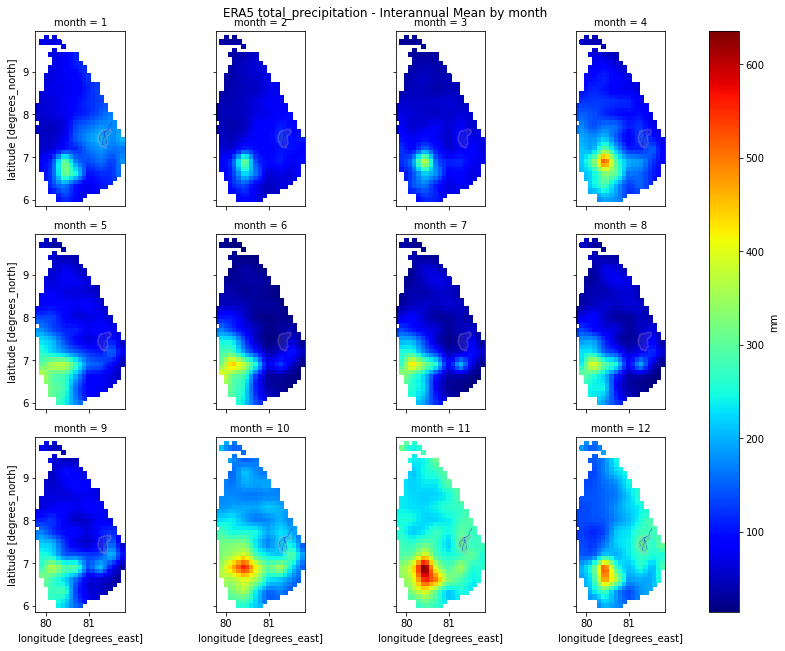

In [76]:
"""
Created on november 2020
@author: Loïc Duffar
"""
import matplotlib.pyplot as plt
import hvplot
import hvplot.pandas
import pandas as pd

pd.options.plotting.backend = "matplotlib"# restore default pandas backend (matplotlib) in case plotly have been substituate before

# ========= Compute/save/plot Interannual average
#---------- Compute annual sums/means AND averages the results over all years (except the last/current year which is probably incomplete)
if param in param_mean:
    interannual_average = xarray_src[param].groupby('time.year').mean('time', skipna=False)[:-1].mean('year')
else:
    interannual_average = xarray_src[param].groupby('time.year').sum('time', skipna=False)[:-1].mean('year')

# ---------- Save the interannual raster to geotif file
interannual_average_file = 'ERA5 interannual average'
interannual_average.rio.to_raster(os.path.join(folder_out, interannual_average_file + '.tif'))

# ---------- Display and save Plot of interannual map
# . . . . .  plot by HVPLOT
hv_plot1 = interannual_average.hvplot(x='longitude', y='latitude', width=700, geo= True,  crs= cartopy.crs.PlateCarree(),
#                                coastline= '10m', 
                                tiles='CartoLight', # CartoLight, StamenTerrain, StamenTerrainRetina, EsriTerrain, EsriNatGeo
                                cmap= cmap, clabel= units, title='ERA5 '+ long_name + ' - Interannual average', alpha=0.6,
                                     )
hv_plot2 = interannual_average.hvplot.contour(x='longitude', y='latitude', geo= True,  crs= cartopy.crs.PlateCarree(),
                                              levels=nlevels, line_width=2, cmap='blues', alpha=1,
                                            )
hv_plot = hv_plot1 * hv_plot2
if gdf_polyg is not None:
    hv_plot3 = gdf_polyg.hvplot(geo= True,  crs= cartopy.crs.PlateCarree(), alpha=0.2)
    hv_plot = hv_plot * hv_plot3
if gdf_wrapping is not None:
    hv_plot4 = gdf_wrapping.hvplot(geo= True,  crs= cartopy.crs.PlateCarree(), alpha=1, color='blue', )
    hv_plot = hv_plot * hv_plot4
hvplot.save(hv_plot, os.path.join(folder_out, interannual_average_file+'.html'), dpi=150)
#hvplot.show(hv_plot)
'''
# . . . . .  plot by CARTOPY
display(interannual_average)
ax = plt.subplot( projection=proj)
plot = interannual_average.plot.pcolormesh('longitude', 'latitude', ax=ax)
#print(plot)
#ax = plt.gca()

ax.coastlines(resolution=res)
'''

# ========= Plot Mean by month maps (facet plot)
ds_by_month = xarray_src.groupby('time.month').mean('time')
grid = ds_by_month[param].plot(col= 'month', subplot_kws= dict(transform= proj ), 
                        col_wrap= 4, cmap= cmap, cbar_kwargs=dict(label= units))# ax= ax, 
for im in plt.gca().get_images():
    im.set_clim(xarray_src[param].min(), xarray_src[param].max())

for ax in grid.axes.flat:
    if gdf_polyg is not None: gdf_polyg.boundary.plot(ax=ax, edgecolor='pink', facecolor='grey', alpha=0.2)
    if gdf_wrapping is not None: gdf_wrapping.plot(ax=ax, edgecolor='grey', facecolor='none', alpha=0.5, color='blue', linewidth=0.5,) 
plt.gcf().suptitle('ERA5 '+ variable + ' - Interannual Mean by month', y=1)
mean_by_month_file = 'ERA5 Interannual Mean by month.png'
plt.savefig(os.path.join(folder_out, mean_by_month_file), dpi=150)

hv_plot

### <a name=section04></a>4) Plot and export monthly time serie for one pixel and for a possible polygon
- Customize the coordinate (latitude, longitude) of the point for time serie extraction
- Run the file to export time series for the choosen point and for the possible polygon (as well as corresponding graphs)

NB: An excel file is saved in the user defined output directory, and contains numeric timeseries (monthly and yearly), corresponding graphs as well as some maps

Plotly version:  4.14.1
INTERANNUAL MEAN: <xarray.DataArray 'tp' ()>
array(1487.50109401)
Coordinates:
    longitude  float32 81.6
    latitude   float32 7.7


C:\Users\DUFFAR\AppData\Local\Continuum\anaconda3\lib\site-packages\rasterstats\io.py:301: UserWarning:

Setting nodata to -999; specify nodata explicitly



C:\Users\DUFFAR\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning:


The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.

C:\Users\DUFFAR\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning:


The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.



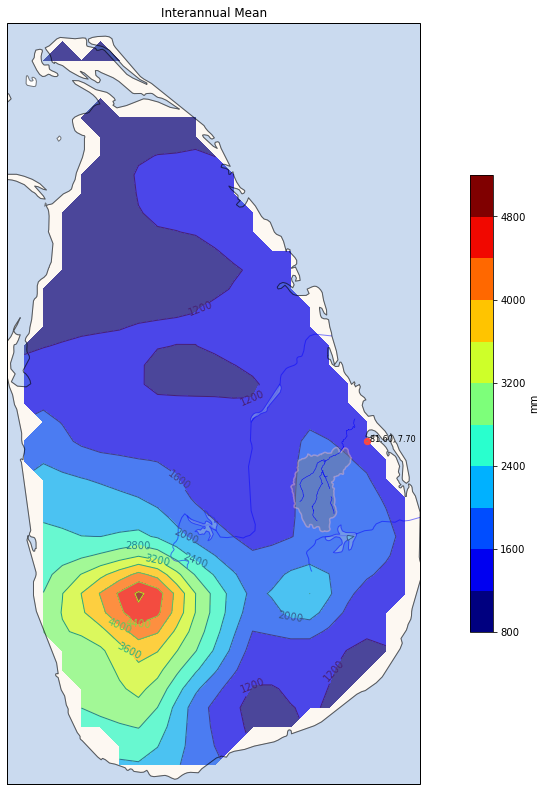

In [74]:
"""
Created on december 2020
@author: Loïc Duffar
"""
import numpy as np
import rasterstats
import cartopy.feature as cfeature
import plotly
import plotly.graph_objects as go
import plotly.express as px
import affine
print('Plotly version: ', plotly.__version__)

pd.options.plotting.backend = "plotly"# replace default pandas backend (matplotlib) by plotly

# +++++++ Customization: Point from where to extract time serie
lat, lon = [43.5, 5.4]# FRANCE PACA Aix 
lat, lon = [8.35, 17.73] # TCHAD Moissala 
lat, lon = [7.7, 81.6]# SRI LANKA Batticaloa

# ++++++++++ MONTHLY time series extraction (and computation of total by year and interannual average)
# ---------- ...from point
time_serie = xarray_src[param].sel(longitude=lon, latitude=lat, method="nearest", tolerance=0.05)# toterance of 1/2 latitude and longitude step (0.1 degree) 
if param in param_mean:
    time_serie_by_year = time_serie.groupby('time.year').mean('time')[:-1]
else:
    time_serie_by_year = time_serie.groupby('time.year').sum('time')[:-1]

print('INTERANNUAL MEAN:', time_serie_by_year.mean())

nround = 2
df = time_serie.to_dataframe().round(nround)
df.drop(labels=['latitude', 'longitude'], axis=1, inplace=True)
col_point = str(lon) + ', ' + str(lat)
df.rename(columns= {param: col_point}, inplace=True)
'''
df2 = time_serie_by_year.to_dataframe().round(nround)
df2.drop(labels=['latitude', 'longitude'], axis=1, inplace=True)
df2.rename(columns= {param: col_point}, inplace=True)
'''
# ---------- ...from polygon
col_polyg = None
if gdf_polyg is not None:
    col_polyg = 'Polygon'
    affine_obj = affine.Affine(0.1, 0, xarray_src['longitude'][0].values, 0, -0.1, xarray_src['latitude'][0].values)
    ts_polyg = []
    for date in xarray_src['time'].values:
        date_string = str(date)[:10]
        raster = xarray_src[param].sel(time= date_string).values
        stats = rasterstats.zonal_stats(gdf_polyg, raster, affine=affine_obj, stats=['mean'])
        ts_polyg.append(round(stats[0]['mean'], nround))
    df[col_polyg] = ts_polyg

# ++++++++++ YEARLY time series
if param in param_mean:
    df2 = df.groupby(df.index.year).mean()[:-1]
else:
    df2 = df.groupby(df.index.year).sum()[:-1]
#df2.rename_axis(index={'time': 'year'}, inplace=True)
#    df2[col_polyg] = ts_polyg_by_year
#    display(df2)
    
# +++++++++++ Display monthly values in columns by month
tables = []
df['MONTH'] = df.index.month
df['YEAR'] = df.index.year
for par in [col_point, col_polyg]:
    if par is not None: 
        table = df[[par, 'MONTH', 'YEAR']]
        table = table.pivot_table(values= par, index='YEAR', columns='MONTH')    # convert long-form dataframe to wide-form
        if par in param_mean:
            table['Mean'] = table.apply(func=np.mean, axis='columns')            # compute and add annual average
        else:
            table['Total'] = table.apply(func=np.sum, axis='columns')            # compute and add annual sum
        avg = table.mean()                                                       # compute interannual average
        table.append(avg.rename('Mean', inplace=True, axis='index'))             # add this average as a row of table
        #display(table)
        tables.append(table)
df.drop(labels=['MONTH', 'YEAR'], axis=1, inplace=True)
    
# ++++++++++ plot time series
# .......... hvplot
#graph = time_serie.hvplot(title='Monthly timeserie',)                 
# .......... plotly (if backend has been change at the beginning)
colors= px.colors.qualitative.D3
prefix = 'ERA5 '+ variable
fig = df.plot(width=950, height=400, labels={'value': units}, color_discrete_sequence= colors, 
              title=prefix+' - Monthly time serie')
fig2 = df2.plot(width=950, height=400, labels={'value': units}, color_discrete_sequence= colors, 
                title=prefix+' - Yearly time serie')
fig.update_layout(title_x=0.5)
fig2.update_layout(title_x=0.5)
if gdf_polyg is not None:
    fig3 = plotly.subplots.make_subplots(rows=1, cols=2, subplot_titles=("Monthly", "Yearly"))
    fig3.update_xaxes(title=col_point)
    fig3.update_yaxes(title=col_polyg)
    fig3.update_layout(height=500, width=900, showlegend=False, title_text="Correlation between point and polygon",
                      title_x=0.5)
    
    trace = go.Scatter(x=df[col_point], y=df[col_polyg], mode='markers', marker_color=colors[2], marker_opacity= 0.5)
    fig3.add_trace(trace, row=1, col=1)
    fig_trendline = px.scatter(df, x=col_point, y=col_polyg, trendline='ols', trendline_color_override='grey')
    fig3.add_trace(fig_trendline.data[1], row=1, col=1)
    results = px.get_trendline_results(fig_trendline)
    params = results.iloc[0]['px_fit_results'].params
    text = 'y = {:7.3f} x + {:7.3f}'.format(params[1], params[0])
    fig3.add_annotation(x=0.05, y=0.95, xref= 'paper', yref= 'paper', text=text, showarrow= False)
    
    trace = go.Scatter(x=df2[col_point], y=df2[col_polyg], mode='markers', marker_color=colors[6])
    fig3.add_trace(trace, row=1, col=2)
    fig_trendline = px.scatter(df2, x=col_point, y=col_polyg, trendline='ols', trendline_color_override='grey')
    fig3.add_trace(fig_trendline.data[1], row=1, col=2)
    results = px.get_trendline_results(fig_trendline)
    params = results.iloc[0]['px_fit_results'].params
    text = 'y = {:7.3f} x + {:7.3f}'.format(params[1], params[0])
    fig3.add_annotation(x=df2[col_point].min(), y=df2[col_polyg].max(), text=text, showarrow= False, row= 1,  col= 2)


monthly_graph_file = os.path.join(folder_out, 'ERA5 monthly.png')
yearly_graph_file = os.path.join(folder_out, 'ERA5 yearly.png')
correlation_graph_file = os.path.join(folder_out, 'ERA5 correlation pixel_polygon-averaged.png')
fig.write_image(monthly_graph_file)
fig2.write_image(yearly_graph_file)
fig.show()
fig2.show()
if gdf_polyg is not None:
    fig3.write_image(correlation_graph_file)
    fig3.show()

# ++++++++++ Plot interannual average map (again... but this one is exportable and it shows the pixel corresponding to timeserie)
#--------------- Options
fill_contours = True
plot_raingauges = True
raingauge_name = False
shape_files = True
#--------------- Plot and map setup
border = 0
x_ext = (lon_max - lon_min) * border
y_ext = (lat_max - lat_min) * border
proj = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(projection= proj)
ax.set_extent([lon_min-x_ext, lon_max+x_ext, lat_min-y_ext, lat_max+y_ext], crs=proj)
#--------------- plot contours
if fill_contours:
    cs1 = xr.plot.contourf(interannual_average, 'longitude', 'latitude', ax=ax, levels=nlevels+2, cmap=plt.cm.jet, alpha=1,
                          cbar_kwargs=dict(shrink=0.6, label=units))# contour fills
cs2 = xr.plot.contour(interannual_average, 'longitude', 'latitude', ax=ax, levels=nlevels+2, linewidths=1)# contour allows to plot contour lines (contourf does not) 
plt.clabel(cs2, fontsize=10, fmt='%4d', inline=True)
#cb = plt.colorbar(cs1, shrink=0.6)
#cb.set_label(units)
#--------------- plot the pixel point
plt.scatter(lon,lat, s=40, color='red')
text = '{:4.2f}'.format(lon)+', '+'{:4.2f}'.format(lat)
plt.annotate(text, (lon,lat), xytext=(3,0), textcoords='offset points', fontsize=8, color='black', \
             arrowprops=dict(arrowstyle='-', color='grey') )
#--------------- Map customization (Polygon and shape file)
if gdf_polyg is not None: gdf_polyg.boundary.plot(ax=ax, edgecolor='pink', facecolor='grey', alpha=0.4)
if gdf_wrapping is not None: gdf_wrapping.plot(ax=ax, edgecolor='grey', facecolor='none', color='blue', linewidth=0.5,) 
#--------------- Map wrapping (NaturalEarth)
res = '10m' # 10m, 50m or 110m (10m = 1/ 10 000 000)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', res, facecolor='antiquewhite', edgecolor='black'),\
                alpha=0.3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', res, facecolor='none', 
                edgecolor='blue'), alpha=0.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'rivers_europe', res, facecolor='none', edgecolor='blue'))
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'lakes', res, facecolor=cfeature.COLORS['water'], edgecolor='blue'), \
                alpha=0.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', res, facecolor=cfeature.COLORS['water'], edgecolor='black'), \
                alpha=0.5)
#ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastlines', res, facecolor='none', edgecolor='black'))
#ax.coastlines(resolution=res)
plt.title(('Interannual Mean'), loc='center')
plt.savefig(os.path.join(folder_out, interannual_average_file+'.png'), dpi=150)

# ++++++++++ Save the data and graphs in excel file
excel_file = 'ERA5 timeserie.xlsx'
writer = pd.ExcelWriter(os.path.join(folder_out, os.path.join(folder_out, excel_file)), engine= 'xlsxwriter')
workbook  = writer.book
#--------------- Single column
df.to_excel(writer, sheet_name='unique_column', startrow=3, engine= 'xlsxwriter')
worksheet = writer.sheets['unique_column']
#worksheet.write('A1', 'Lat.=')
#worksheet.write('A2', 'Lon.=')
worksheet.write('A1', 'Param.=')
worksheet.write('A2', 'Unit=')
#worksheet.write('B1', lat)
#worksheet.write('B2', lon)
worksheet.write('B1', param)
worksheet.write('B2', units)
if os.path.exists(monthly_graph_file):
    worksheet.insert_image('D1', monthly_graph_file)
if os.path.exists(yearly_graph_file):
    worksheet.insert_image('D20', yearly_graph_file)
if os.path.exists(os.path.join(folder_out, interannual_average_file+'.png')):
    worksheet.insert_image('D40', os.path.join(folder_out, interannual_average_file+'.png'))
if os.path.exists(os.path.join(folder_out, mean_by_month_file)):
    worksheet.insert_image('T1', os.path.join(folder_out, mean_by_month_file))
if os.path.exists(os.path.join(folder_out, facet_plot_subset_file)):
    worksheet.insert_image('AL1', os.path.join(folder_out,facet_plot_subset_file))
if os.path.exists(os.path.join(folder_out, annual_file)):
    worksheet.insert_image('AL40', os.path.join(folder_out, annual_file))
#--------------- One column by month
for col, table in zip([col_point, col_polyg], tables):
    table.to_excel(writer, sheet_name=col+'_by_month', startrow=3, engine= 'xlsxwriter') # save wide-form table
    worksheet = writer.sheets[col+'_by_month']

    worksheet.write('A1', 'Localisation=')
    worksheet.write('A2', 'Var.=')
    worksheet.write('A3', 'Unit=')
    worksheet.write('B1', col)
    worksheet.write('B2', param)
    worksheet.write('B3', units)
    chart = workbook.add_chart({'type': 'scatter', 'subtype': 'straight'})
    chart.add_series({'categories': "='"+col+"_by_month'!$A$5:$A$100",
                      'values': "='"+col+"_by_month'!$N$5:$N$100"})
    worksheet.insert_chart('O1', chart)
if gdf_polyg is not None:
    worksheet.insert_image('O16', os.path.join(folder_out, correlation_graph_file))
writer.save()

### <a name=section05></a>5) Annual maps animation
Run the cell to plot annual maps animation

In [12]:
"""
Created on november 2020
@author: Loïc Duffar
"""
import hvplot

if param in param_mean:
    year_time_serie = xarray_src[param].groupby('time.year').mean(dim='time', skipna=False)[:-1]    
else:
    year_time_serie = xarray_src[param].groupby('time.year').sum(dim='time', skipna=False)[:-1]

hv_plot_year = year_time_serie.hvplot(x='longitude', y='latitude',
                        width=600, alpha=0.6, geo= True,  crs= proj, clim=(0, year_time_serie.max()),
                        widget_location="right", cmap='jet', clabel= units,
#                        coastline= '10m',
                        tiles='CartoLight', # https://holoviews.org/reference/elements/bokeh/Tiles.html
                                    #CartoLight, CartoMidnight, CartoEco, CartoDark, Wikipedia, OSM, 
                                    # EsriImagery, EsriNatGeo, EsrUSATopo, EsriTerrain, EsriReference, 
                                )   # StamenTerrain, StamenTerrainRetina, StamenWatercolor, StamenToner, StamenTonerBackground, StamenLabels
#hvplot.save(hv_plot, os.path.join(folder_out, 'ERA5 annual animation.html'))# AttributeError: 'Row' object has no attribute 'layout'
hv_plot_year


Row
    [0] HoloViews(DynamicMap, widget_location='right')
    [1] Column
        [0] VSpacer()
        [1] WidgetBox
            [0] DiscreteSlider(margin=(20, 20, 20, 20), name='year', options=OrderedDict([('1981', ...]), value=1981, value_throttled=1981, width=250)
        [2] VSpacer()

### <a name=section06></a>6) Montlhy maps animation
Run the cell to plot monthly maps animation

In [13]:
"""
Created on november 2020
@author: Loïc Duffar
"""
#....... raster plot by hvplot
#subset = xarray_src.tp.sel(time= date_list)
hv_plot_month = xarray_src[param].hvplot(x='longitude', y='latitude',
                        groupby="time",  # groups by time AND adds a widget for time
                        widget_type="scrubber",
                        widget_location="bottom",
                        width=500, alpha=0.6, geo= True,  crs= proj, clim=(xarray_src[param].min(), xarray_src[param].max()),
#                        coastline= '10m',
                        tiles='CartoLight', cmap= cmap, clabel= units,
                       )
#hvplot.save(hv_plot_month, os.path.join(folder_out, 'ERA5 monthly maps animation.html'))# AttributeError: 'Column' object has no attribute 'layout'
hv_plot_month

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=477, width=550)
        [2] HSpacer()

### <a name=section07></a>7) Plot maps over 12 months for a specific year (and month map with basemap)
- Customize the year to plot (date for the first day)
- Run the cell to plot the maps

WORK IN PROGRESS: 
- crash if the chosen year is not complete


C:\Users\DUFFAR\AppData\Local\Continuum\anaconda3\lib\site-packages\rasterstats\io.py:301: UserWarning:

Setting nodata to -999; specify nodata explicitly



Average value over polygon=  [{'mean': 75.86716259850397}]  mm


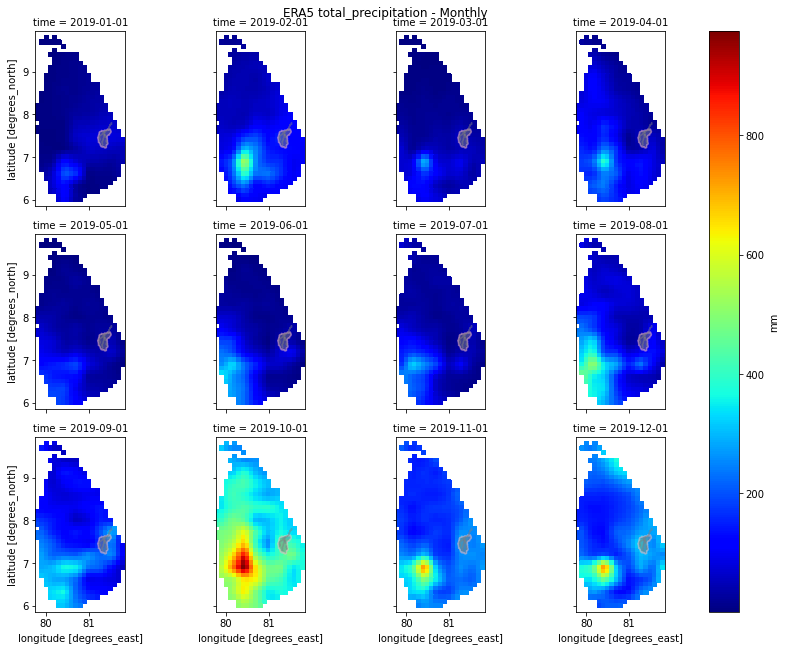

C:\Users\DUFFAR\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning:


The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.

C:\Users\DUFFAR\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning:


The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.



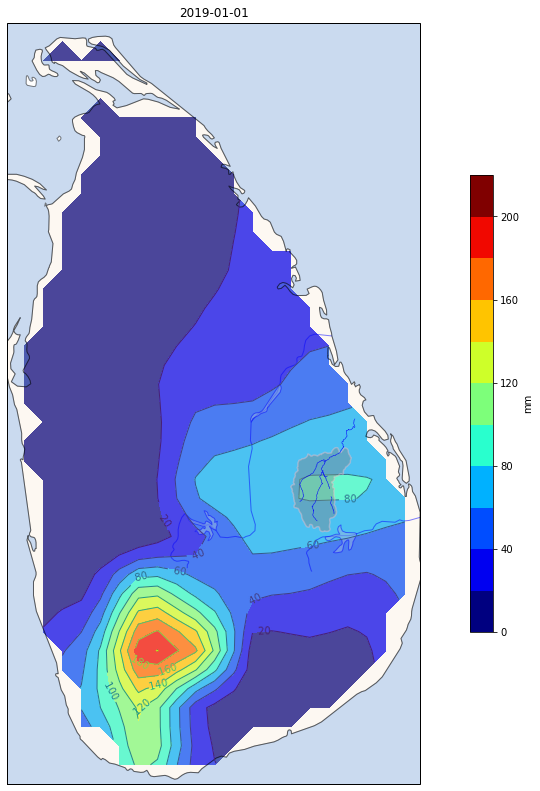

:Overlay
   .Tiles.I    :Tiles   [x,y]
   .Image.I    :Image   [longitude,latitude]   (tp)
   .Contours.I :Contours   [longitude,latitude]   (tp)
   .Polygons.I :Polygons   [Longitude,Latitude]
   .Path.I     :Path   [Longitude,Latitude]

In [19]:
import rasterstats
import geopandas as gpd
import cartopy.feature as cfeature
import matplotlib as mpl

# ++++++++++++++++ Customization
date_string = '2019-01-01'  # date string beginning by year with '-' separator (xarray format)

# ++++++++++++++++ Averaging pixels over polygon
if gdf_polyg is not  None:
    raster = xarray_src[param].sel(time= date_string).values
    affine = affine.Affine(0.1, 0, xarray_src['longitude'][0].values, 0, -0.1, xarray_src['latitude'][0].values)
    res = rasterstats.zonal_stats(gdf_polyg, raster, affine=affine, stats=['mean'])
    print('Average value over polygon= ', res, ' '+units)

# ++++++++++++++++ PLOTTING
#---------------- RASTER plot by xarray with FACET (map wrapping not allowed for cartopy facet plot)
date_list = pd.date_range(start=date_string, freq='MS', periods=12)
#fig = plt.figure(figsize=[10, 8])
#ax = fig.add_subplot(1, 1, 1, projection=proj)
# TO BE FIXED : does not works if the year is not complete
facet_grid = xarray_src[param].sel(time= date_list).plot(col= 'time', subplot_kws= dict(transform= proj), 
                                                         col_wrap= 4, cmap= cmap, cbar_kwargs={"label": units},)# ax= ax, 
for ax in facet_grid.axes.flat:
    if gdf_polyg is not None: gdf_polyg.boundary.plot(ax=ax, edgecolor='pink', facecolor='grey', alpha=0.5)
    if gdf_wrapping is not None: gdf_wrapping.plot(ax=ax, edgecolor='grey', facecolor='none', alpha=0.5, ) 
plt.gcf().suptitle('ERA5 '+ variable + ' - Monthly', y=1)
#for i, axis in enumerate(facet_grid.axes.flat):
#    axis.coastlines(resolution=res)
plt.savefig(os.path.join(folder_out, facet_plot_subset_file), dpi=150)
mpl.interactive(True) # allows to show multiple plots
plt.show()

#--------------- CONTOUR plot by matplotlib/cartopy with map wrapping
border = 0
x_ext = (lon_max - lon_min) * border
y_ext = (lat_max - lat_min) * border
proj = cartopy.crs.PlateCarree()
fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(projection= proj)
ax.set_extent([lon_min-x_ext, lon_max+x_ext, lat_min-y_ext, lat_max+y_ext], crs=proj)
#. . . . . . . . plot contours
if fill_contours:
    cs1 = xr.plot.contourf(xarray_src.sel(time= date_string)[param], 'longitude', 'latitude', levels=nlevels+2, 
                           cmap=plt.cm.jet, alpha=1, cbar_kwargs=dict(shrink=0.6, label=units))# contour fills
cs2 = xr.plot.contour(xarray_src.sel(time= date_string)[param], 'longitude', 'latitude', levels=nlevels+2, 
                      linewidths=1)# contour allows to plot contour lines (contourf does not)
plt.clabel(cs2, fontsize=10, fmt='%4d', inline=True)
#cb = plt.colorbar(cs1, shrink=0.6)
#cb.set_label(units)

#. . . . . . . . Map customization (Polygon and shape file)
if gdf_polyg is not None: gdf_polyg.boundary.plot(ax=ax, edgecolor='pink', facecolor='grey', alpha=0.4)
if gdf_wrapping is not None: gdf_wrapping.plot(ax=ax, edgecolor='grey', facecolor='none', alpha=1, color='blue', linewidth=0.5,) 

#. . . . . . . . Map wrapping (NaturalEarth)
res = '10m' # 10m, 50m or 110m (10m = 1/ 10 000 000)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', res, facecolor='antiquewhite', edgecolor='black'),
                alpha=0.3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', res, facecolor='none', 
                edgecolor='blue'), alpha=0.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'rivers_europe', res, facecolor='none', edgecolor='blue'))
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'lakes', res, facecolor=cfeature.COLORS['water'], edgecolor='blue'), 
                alpha=0.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', res, facecolor=cfeature.COLORS['water'], edgecolor='black'), 
                alpha=0.5)
#ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastlines', res, facecolor='none', edgecolor='black'))
#ax.coastlines(resolution=res)
plt.title((date_string), loc='center')
plt.savefig(os.path.join(folder_out, annual_file), dpi=150)

'''
#---------------- RASTER plot by xarray plot method (theoricaly allowing cartopy wrapping, but a bug has to be resolved)
#img_extent = [lon_min, lon_max, lat_min, lat_max]
#ax.set_extent(img_extent, crs=proj)
#ax.imshow(array_src, origin='upper', extent=img_extent, transform=proj, cmap='jet_r', alpha=0.5)

#ax = plt.subplot(projection=cartopy.crs.PlateCarree())
fig, ax = plt.subplots(1, 1, figsize=(9,7), subplot_kw=dict(projection= proj) )
xarray_src[param].sel(time= date_string).plot(subplot_kws= dict(transform= proj),
                                                 add_colorbar= True, cmap= cmap)
plt.gcf().suptitle('ERA5 '+ variable + ' - Monthly averaged', y=0.95)

# Map wrapping (cartopy)
if df_wrapping is not None: ax.add_geometries(df_wrapping.geometry, crs=proj, facecolor='none', edgecolor='blue', alpha=1)
ax.coastlines(resolution=res)
#ax.add_feature(cfeature.NaturalEarthFeature(category='physical', name='land', scale= res, edgecolor='face', facecolor=cfeature.COLORS['land']), alpha=0.3)
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', name='ocean', scale=res, facecolor=cfeature.COLORS['water'], edgecolor='none'), alpha=0.5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', res, facecolor='none', edgecolor='steelblue'))
#rasterstats.zonal_stats()
'''
plt.show()

#---------------- RASTER plot by hvplot (with basemap, contour lines and value display)
hv_plot1 = xarray_src[param].sel(time=(date_string)).hvplot(x='longitude', y='latitude', width=600, alpha=0.6, geo= True, 
#                                                        coastline= '10m',
                                                        crs= proj, tiles='CartoLight', cmap= cmap, clabel= units,)
hv_plot2 = xarray_src[param].sel(time=(date_string)).hvplot.contour(x= 'longitude', y= 'latitude', levels=nlevels, width= 600, geo= True)
hv_plot3 = gdf_polyg.hvplot(geo= True,  crs= cartopy.crs.PlateCarree(), alpha=0.2)
hv_plot4 = gdf_wrapping.hvplot(geo= True,  crs= cartopy.crs.PlateCarree(), alpha=1, colors='blue')
hv_plot = hv_plot1 * hv_plot2 * hv_plot3 * hv_plot4
hv_plot